In [1]:
!git clone https://github.com/YizhongHu/rocket_circularization
!mv ./rocket_circularization/* ./

Cloning into 'rocket_circularization'...
remote: Enumerating objects: 364, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 364 (delta 1), reused 1 (delta 0), pack-reused 357
Receiving objects: 100% (364/364), 27.26 MiB | 24.01 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [3]:
import rocket_gym
from DQN import DeepQNetwork

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import FileLink

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 17,411
Trainable params: 17,411
Non-trainable params: 0
_________________________________________________________________
Episode: 0


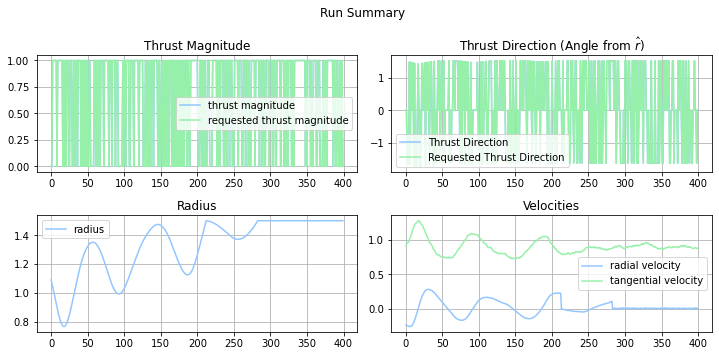

iters: 400, tot_rwd: -1.802e+02
Episode: 1
iters: 400, tot_rwd: -9.273e+01
Episode: 2
iters: 400, tot_rwd: -7.281e+01
Episode: 3
iters: 400, tot_rwd: -1.191e+02
Episode: 4
iters: 400, tot_rwd: -7.583e+01
Episode: 5
iters: 400, tot_rwd: -1.018e+02
Episode: 6
iters: 400, tot_rwd: -6.690e+01
Episode: 7
iters: 400, tot_rwd: -1.323e+02
Episode: 8
iters: 400, tot_rwd: -1.749e+02
Episode: 9
iters: 400, tot_rwd: -7.848e+01
Episode: 10
iters: 400, tot_rwd: -1.170e+02
Episode: 11
iters: 400, tot_rwd: -1.301e+02
Episode: 12
iters: 400, tot_rwd: -1.077e+02
Episode: 13
iters: 400, tot_rwd: -1.131e+02
Episode: 14
iters: 400, tot_rwd: -5.430e+01
Episode: 15
iters: 400, tot_rwd: -1.570e+02
Episode: 16
iters: 400, tot_rwd: -1.096e+02
Episode: 17
iters: 400, tot_rwd: -9.638e+01
Episode: 18
iters: 400, tot_rwd: -1.047e+02
Episode: 19
iters: 400, tot_rwd: -1.575e+02
Episode: 20
iters: 400, tot_rwd: -1.204e+02
Episode: 21
iters: 400, tot_rwd: -1.320e+02
Episode: 22
iters: 400, tot_rwd: -1.275e+02
Episode: 

KeyboardInterrupt: 

In [4]:
model_name = './dqn_test_10/'

model = DeepQNetwork(dims=[3, 128, 128, 3],
                        epsilon=1.0, epsilon_decay=.1, gamma=.95,
                        memory=100000, start_updating=50000,
                        batch_size=32, learning_rate=1e-4, descent_frequency=800, update_frequency=8,
                        use_target=True, target_frequency=8)
# model.load('./pdlm_ddpg_destablized/')
with rocket_gym.make('RocketCircularization-v0') as env:
    env = rocket_gym.PolarizeObservation(
        rocket_gym.TangentialThrust(
            rocket_gym.PolarizeAction(env)))
    model.train(env, episodes=1500, render_frequency=100, summary=True)
    model.save(model_name)

In [4]:
model.save(model_name)

In [5]:
!zip -r ./dqn_test_8.zip ./dqn_test_8

  adding: dqn_test_8/ (stored 0%)
  adding: dqn_test_8/experience.pk (deflated 55%)
  adding: dqn_test_8/checkpoint (deflated 34%)
  adding: dqn_test_8/.data-00000-of-00001 (deflated 8%)
  adding: dqn_test_8/.index (deflated 47%)


In [6]:
FileLink(r'./dqn_test_8.zip')

/kaggle/working/dqn_test_8.zip

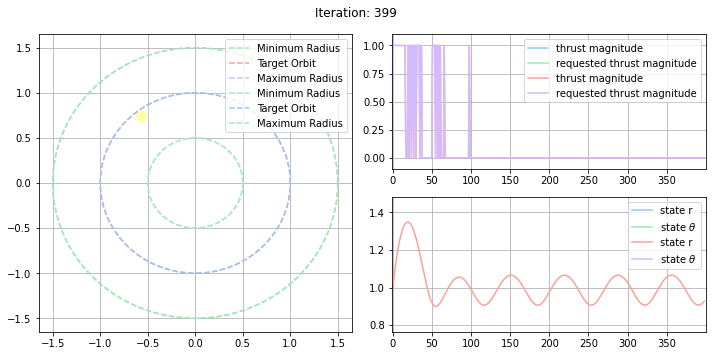

In [7]:
with rocket_gym.make('RocketCircularization-v0') as env:
    env = rocket_gym.PolarizeObservation(
        rocket_gym.TangentialThrust(
            rocket_gym.PolarizeAction(env)))
    model.load(model_name)
    model.simulate(env, render=True, evaluation=True, path='test.mp4')

In [8]:
#rs = np.linspace(0.5, 1.5, 100)
#rdts = np.linspace(-10, 10, 100)
#rm, rdtm = np.meshgrid(rs, rdts)
#inputs = np.hstack(
#    (rm.reshape(-1, 1), rdtm.reshape(-1, 1)))
#action = tf.reshape(tf.argmax(model.q_net(inputs), axis=-1), (100, 100))

#cs = plt.contourf(rm, rdtm, action - 1, label='max Q value')
#plt.colorbar(cs)
#plt.xlabel('radius')
#plt.ylabel('r dot')
#plt.legend()
#plt.show()